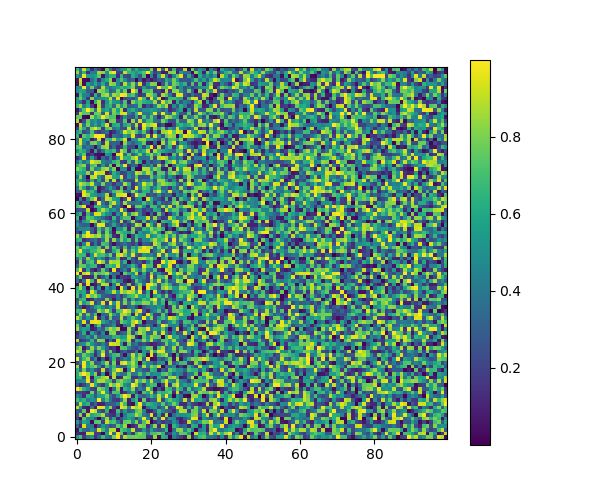

In [1]:
%matplotlib widget
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.widgets import Cursor

# Sample xarray dataset
ny, nx = 100, 100  # Grid size
data = np.random.rand(ny, nx)
coords = {"y": np.arange(ny), "x": np.arange(nx)}
dataset = xr.Dataset({"var": (("y", "x"), data)}, coords=coords)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
cmap = ax.imshow(dataset["var"], origin="lower", cmap="viridis")
fig.colorbar(cmap, ax=ax)
selected_point, = ax.plot([], [], 'ro', markersize=8)

# Enable cursor tracking
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

selected_coords = {"x" : 0, "y" : 0}

def on_click(event):
    if event.xdata is not None and event.ydata is not None:
        x_idx = int(round(event.xdata))
        y_idx = int(round(event.ydata))
        print(f"Selected point: x={x_idx}, y={y_idx}")
        selected_point.set_data(x_idx, y_idx)
        fig.canvas.draw_idle()
        selected_coords['x'] = x_idx
        selected_coords['y'] = y_idx

fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()

In [26]:
selected_coords

{'x': 50, 'y': 19}